In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
    
dataset = pd.read_csv('data.csv')  
x = dataset.iloc[:, [2, 3]].values  
y = dataset.iloc[:, 4].values  
   
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  
    
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In [2]:
dataset

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


<Axes: xlabel='fail', ylabel='count'>

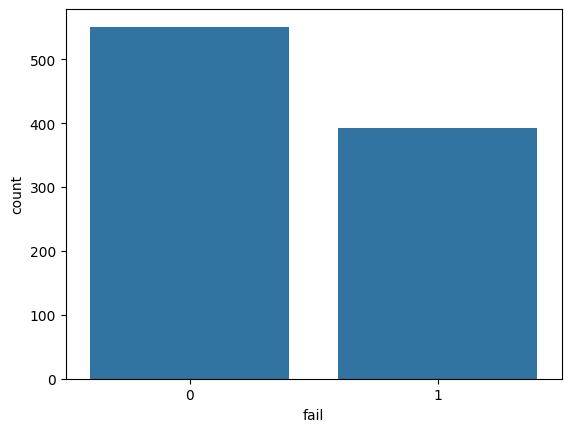

In [3]:
import seaborn as sns
sns.countplot(x='fail', data=dataset)

In [4]:
dataset.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [5]:
dataset.columns

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

In [6]:
dataset['fail']

0      1
1      0
2      0
3      0
4      0
      ..
939    1
940    1
941    1
942    1
943    1
Name: fail, Length: 944, dtype: int64

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
smote = SMOTE(random_state=42)
X = dataset.drop(['fail'],axis=1)
y = dataset['fail']
X_res, y_res = smote.fit_resample(X, y)


In [9]:
print('Original dataset shape:', y.value_counts())
print('Resampled dataset shape:', pd.Series(y_res).value_counts())

Original dataset shape: fail
0    551
1    393
Name: count, dtype: int64
Resampled dataset shape: fail
1    551
0    551
Name: count, dtype: int64


In [10]:
X_res

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1
...,...,...,...,...,...,...,...,...,...
1097,0,7,5,1,5,5,69,3,5
1098,9,5,6,1,5,5,68,6,20
1099,29,2,6,1,6,5,39,5,12
1100,900,4,5,2,5,5,75,3,14


In [11]:
y_res

0       1
1       0
2       0
3       0
4       0
       ..
1097    1
1098    1
1099    1
1100    1
1101    1
Name: fail, Length: 1102, dtype: int64

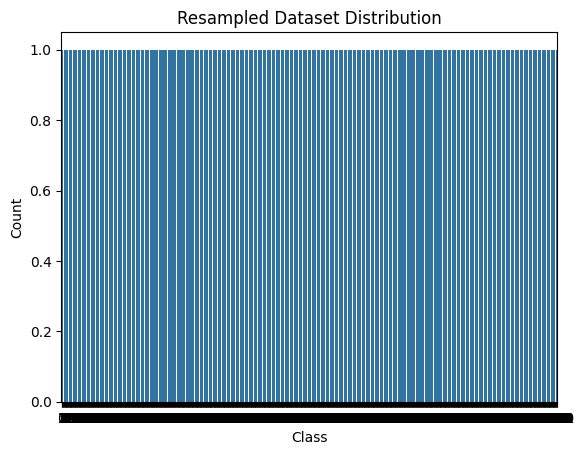

In [12]:
import matplotlib.pyplot as plt
sns.countplot(y_res)
plt.title('Resampled Dataset Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [13]:
X

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1
...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24
940,0,7,5,2,6,6,50,6,24
941,0,3,6,2,7,5,43,6,24
942,0,6,6,2,5,6,46,7,24


In [14]:
y

0      1
1      0
2      0
3      0
4      0
      ..
939    1
940    1
941    1
942    1
943    1
Name: fail, Length: 944, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 2)

In [16]:
len(X_train)

881

In [17]:
len(X_test)

221

In [18]:
881+221

1102

In [19]:
len(X_res)

1102

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [22]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 94   8]
 [  6 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       102
           1       0.93      0.95      0.94       119

    accuracy                           0.94       221
   macro avg       0.94      0.94      0.94       221
weighted avg       0.94      0.94      0.94       221


Accuracy Score:
0.9366515837104072


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
error_rate = []
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

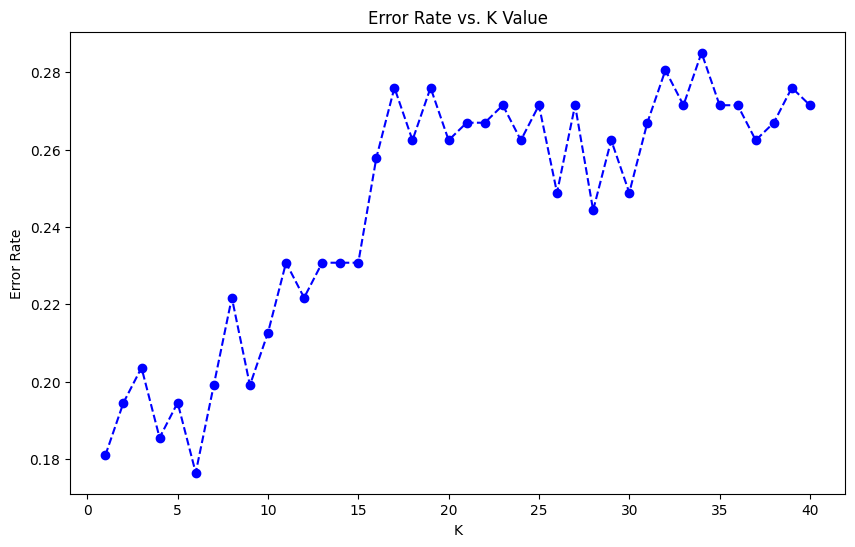

The best number of neighbors is 6


In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, marker='o', linestyle='dashed', color='b')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
best_k = error_rate.index(min(error_rate)) + 1
print(f'The best number of neighbors is {best_k}')

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[91 11]
 [28 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       102
           1       0.89      0.76      0.82       119

    accuracy                           0.82       221
   macro avg       0.83      0.83      0.82       221
weighted avg       0.83      0.82      0.82       221


Accuracy Score:
0.8235294117647058


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

In [28]:
param_dist = {
    'C': uniform(0.1, 100), 
    'gamma': uniform(0.001, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svm = SVC(kernel="linear")
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 94   8]
 [  6 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       102
           1       0.93      0.95      0.94       119

    accuracy                           0.94       221
   macro avg       0.94      0.94      0.94       221
weighted avg       0.94      0.94      0.94       221


Accuracy Score:
0.9366515837104072


In [29]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
import joblib

In [30]:
def perform_random_search_cv_decision_tree(X_train, y_train, n_iter=50):
    param_dist = {
        'max_depth': randint(1, 20),  
        'min_samples_split': randint(2, 20),  
        'min_samples_leaf': randint(1, 20), 
        'criterion': ['gini', 'entropy']  
    }

    dt = DecisionTreeClassifier()

    random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=n_iter, cv=3, verbose=2, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    print("Best parameters found: ", random_search.best_params_)
    print("Best estimator found: ", random_search.best_estimator_)

    return random_search

In [31]:
def save_random_search_cv(random_search, file_path):
    joblib.dump(random_search, file_path)
    print(f"RandomizedSearchCV object saved to {file_path}")
random_search_dt = perform_random_search_cv_decision_tree(X_train, y_train, n_iter=50)

save_random_search_cv(random_search_dt, 'random_search_dt.pkl')

best_dt = random_search_dt.best_estimator_
y_pred = best_dt.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 12, 'min_samples_split': 13}
Best estimator found:  DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=12,
                       min_samples_split=13)
RandomizedSearchCV object saved to random_search_dt.pkl
Confusion Matrix:
[[ 89  13]
 [  6 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       102
           1       0.90      0.95      0.92       119

    accuracy                           0.91       221
   macro avg       0.92      0.91      0.91       221
weighted avg       0.92      0.91      0.91       221


Accuracy Score:
0.9140271493212669


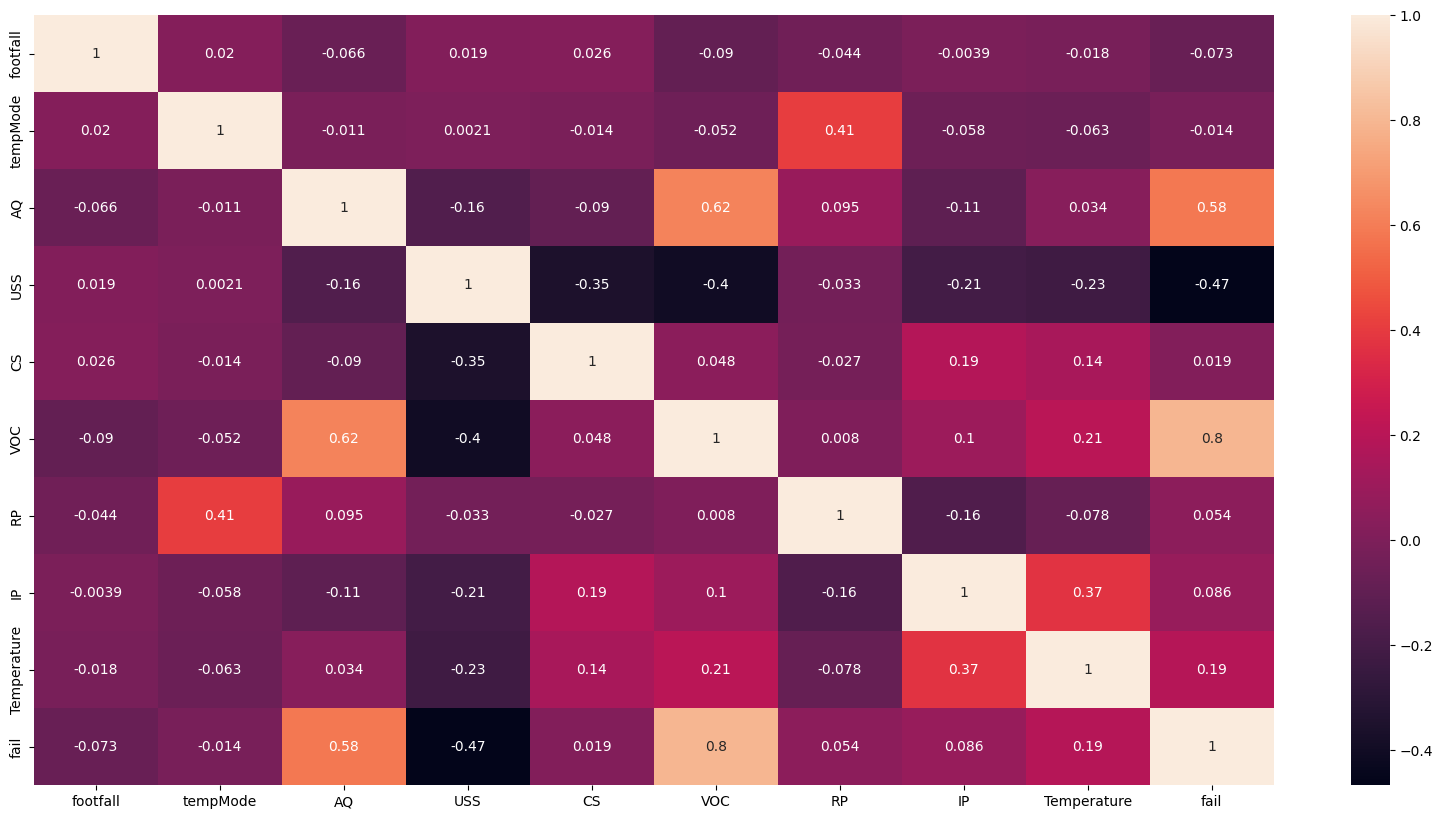

In [32]:
corr = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [33]:
featured_dataset = dataset.drop(["footfall","tempMode","CS","RP","IP"],axis=1)
X_featured = featured_dataset.drop(["fail"],axis=1)
y_featured = featured_dataset["fail"]
X_featured

,AQ,USS,VOC,Temperature
0,7,1,6,1
1,3,3,1,1
2,2,2,1,1
3,3,4,1,1
4,5,6,0,1
...,...,...,...,...
939,7,1,4,24
940,5,2,6,24
941,6,2,5,24
942,6,2,6,24


In [34]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_featured, y_featured, test_size = 0.25, random_state = 28)  
X_train_f

,AQ,USS,VOC,Temperature
395,5,3,2,16
636,5,3,4,20
161,5,3,1,11
519,4,4,0,18
586,6,4,4,20
...,...,...,...,...
259,3,2,1,14
32,4,4,0,3
278,6,5,0,15
517,6,1,5,18


In [35]:
featured_nb_classifier = GaussianNB()
featured_nb_classifier.fit(X_train_f, y_train_f)
y_pred = featured_nb_classifier.predict(X_test_f)

In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_f, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_f, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test_f, y_pred))

Confusion Matrix:
[[131  10]
 [  9  86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       141
           1       0.90      0.91      0.90        95

    accuracy                           0.92       236
   macro avg       0.92      0.92      0.92       236
weighted avg       0.92      0.92      0.92       236


Accuracy Score:
0.9194915254237288


In [37]:
X_train

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
577,34,4,6,2,6,6,30,6,20
414,23,7,3,3,7,0,76,5,17
322,140,7,6,4,5,6,82,5,15
230,6,0,5,4,5,5,55,3,13
65,67,1,4,4,7,1,64,3,4
...,...,...,...,...,...,...,...,...,...
360,0,5,3,3,4,0,50,4,16
466,1600,5,2,3,6,0,29,7,17
299,19,5,5,1,4,6,68,3,15
493,290,0,5,2,6,6,40,6,18


In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
X_poly=poly.fit_transform(X_train)
X_poly_df = pd.DataFrame(X_poly,columns=poly.get_feature_names_out(X.columns))
X_poly_df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,footfall^2,...,VOC^2,VOC RP,VOC IP,VOC Temperature,RP^2,RP IP,RP Temperature,IP^2,IP Temperature,Temperature^2
0,34.0,4.0,6.0,2.0,6.0,6.0,30.0,6.0,20.0,1156.0,...,36.0,180.0,36.0,120.0,900.0,180.0,600.0,36.0,120.0,400.0
1,23.0,7.0,3.0,3.0,7.0,0.0,76.0,5.0,17.0,529.0,...,0.0,0.0,0.0,0.0,5776.0,380.0,1292.0,25.0,85.0,289.0
2,140.0,7.0,6.0,4.0,5.0,6.0,82.0,5.0,15.0,19600.0,...,36.0,492.0,30.0,90.0,6724.0,410.0,1230.0,25.0,75.0,225.0
3,6.0,0.0,5.0,4.0,5.0,5.0,55.0,3.0,13.0,36.0,...,25.0,275.0,15.0,65.0,3025.0,165.0,715.0,9.0,39.0,169.0
4,67.0,1.0,4.0,4.0,7.0,1.0,64.0,3.0,4.0,4489.0,...,1.0,64.0,3.0,4.0,4096.0,192.0,256.0,9.0,12.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0.0,5.0,3.0,3.0,4.0,0.0,50.0,4.0,16.0,0.0,...,0.0,0.0,0.0,0.0,2500.0,200.0,800.0,16.0,64.0,256.0
877,1600.0,5.0,2.0,3.0,6.0,0.0,29.0,7.0,17.0,2560000.0,...,0.0,0.0,0.0,0.0,841.0,203.0,493.0,49.0,119.0,289.0
878,19.0,5.0,5.0,1.0,4.0,6.0,68.0,3.0,15.0,361.0,...,36.0,408.0,18.0,90.0,4624.0,204.0,1020.0,9.0,45.0,225.0
879,290.0,0.0,5.0,2.0,6.0,6.0,40.0,6.0,18.0,84100.0,...,36.0,240.0,36.0,108.0,1600.0,240.0,720.0,36.0,108.0,324.0


In [39]:
len(X_train),len(y_train)

(881, 881)

In [40]:
len(X_test),len(y_test)

(221, 221)

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 91.40


In [42]:
model_xgb_featured = xgb.XGBClassifier()
model_xgb_featured.fit(X_train_f,y_train_f)
y_pred = model_xgb_featured.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f,y_pred)
print(f"Accuracy: {accuracy_f*100:.2f}")

Accuracy: 90.68


In [43]:
dataset = pd.concat([X_res,y_res],axis=1)

In [44]:
dataset

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
1097,0,7,5,1,5,5,69,3,5,1
1098,9,5,6,1,5,5,68,6,20,1
1099,29,2,6,1,6,5,39,5,12,1
1100,900,4,5,2,5,5,75,3,14,1


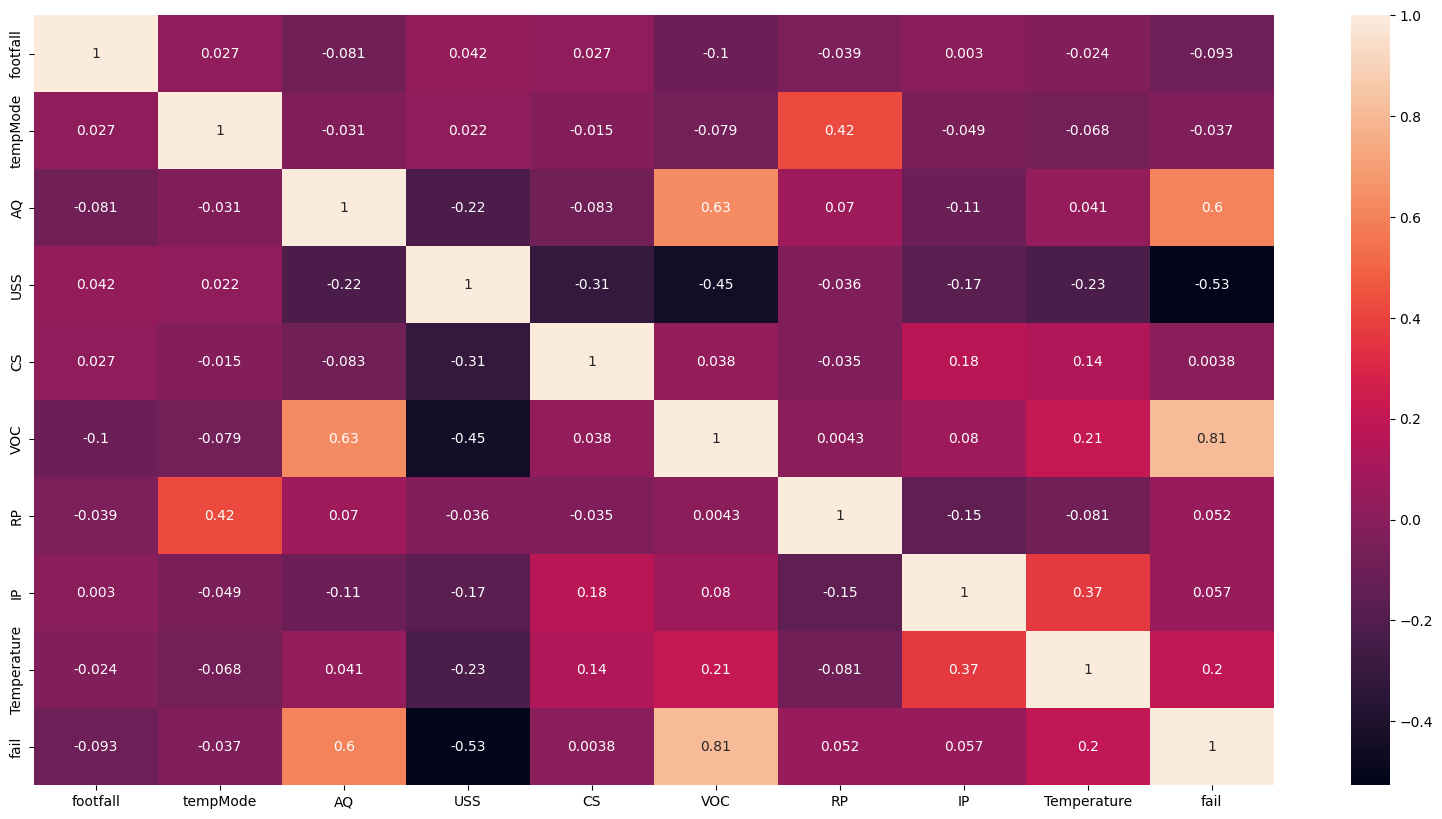

In [45]:
corr = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [46]:
dataset.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,279.604356,3.663339,4.460073,2.758621,5.378403,3.129764,47.146098,4.538113,16.511797,0.500000
std,1011.687821,2.641474,1.400578,1.378370,1.199154,2.248512,16.221040,1.556067,5.822795,0.500227
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,4.000000,2.000000,5.000000,1.000000,35.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,5.000000,2.000000,6.000000,4.000000,44.000000,4.000000,18.000000,0.500000
75%,100.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [47]:
from scipy.stats import chi2_contingency

In [48]:
def chi_squared_test(df, feature, target):
    # Create contingency table
    contingency_table = pd.crosstab(df[feature], df[target])
    
    # Perform chi-squared test
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    
    return chi2_stat

In [49]:
columns = list(dataset.columns)
columns.remove('fail')
columns

['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

In [50]:
chi2_stats = {feature: chi_squared_test(dataset, feature, 'fail') for feature in columns}

In [51]:
chi2_stats

{'footfall': 175.52367079931636,
 'tempMode': 22.391434464962998,
 'AQ': 436.64329248018106,
 'USS': 352.56494767927427,
 'CS': 174.31089825973888,
 'VOC': 761.1273226160612,
 'RP': 97.06779098070623,
 'IP': 16.640661110525507,
 'Temperature': 54.633997521451775}

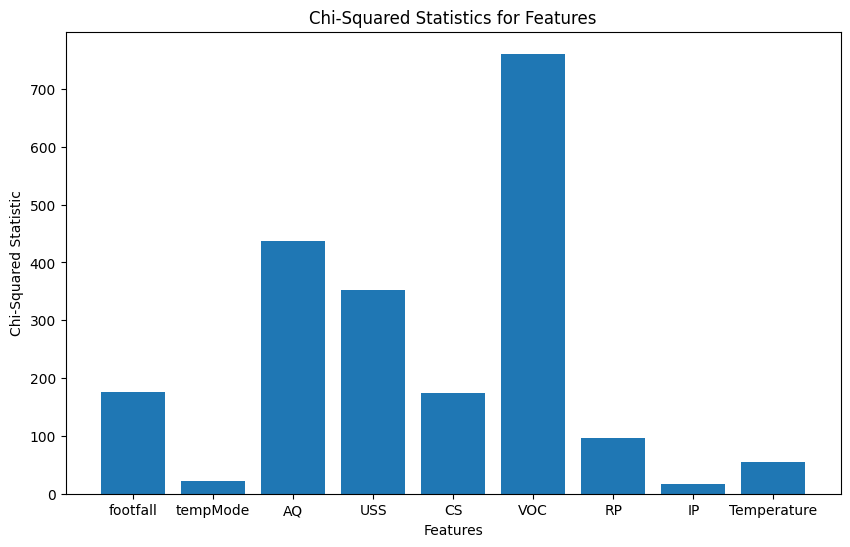

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(chi2_stats.keys(), chi2_stats.values())
plt.xlabel('Features')
plt.ylabel('Chi-Squared Statistic')
plt.title('Chi-Squared Statistics for Features')
plt.show()

In [53]:
chi2_df = pd.DataFrame(list(chi2_stats.items()), columns=['Feature', 'Chi2_Statistic'])

chi2_df = chi2_df.sort_values(by='Chi2_Statistic', ascending=False).reset_index(drop=True)

print("Ranked Features Based on Chi-Squared Statistic:")
print(chi2_df)

Ranked Features Based on Chi-Squared Statistic:
       Feature  Chi2_Statistic
0          VOC      761.127323
1           AQ      436.643292
2          USS      352.564948
3     footfall      175.523671
4           CS      174.310898
5           RP       97.067791
6  Temperature       54.633998
7     tempMode       22.391434
8           IP       16.640661


In [54]:
def model_naive(X_train,y_train,X_test,y_test,features):
    if features:
        X_train = X_train[features]
        X_test = X_test[features]
    model = GaussianNB()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nAccuracy Score:")
    print(accuracy_score(y_test, y_pred))

In [55]:
X_train

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
577,34,4,6,2,6,6,30,6,20
414,23,7,3,3,7,0,76,5,17
322,140,7,6,4,5,6,82,5,15
230,6,0,5,4,5,5,55,3,13
65,67,1,4,4,7,1,64,3,4
...,...,...,...,...,...,...,...,...,...
360,0,5,3,3,4,0,50,4,16
466,1600,5,2,3,6,0,29,7,17
299,19,5,5,1,4,6,68,3,15
493,290,0,5,2,6,6,40,6,18


In [56]:
for i in range(1,10):
    top_features = chi2_df.head(i)['Feature'].tolist()
    print(f"Top {i} Features: {top_features}")
    model_naive(X_train,y_train,X_test,y_test,top_features)

Top 1 Features: ['VOC']
Confusion Matrix:
[[ 89  13]
 [  6 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       102
           1       0.90      0.95      0.92       119

    accuracy                           0.91       221
   macro avg       0.92      0.91      0.91       221
weighted avg       0.92      0.91      0.91       221


Accuracy Score:
0.9140271493212669
Top 2 Features: ['VOC', 'AQ']
Confusion Matrix:
[[ 92  10]
 [  7 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       102
           1       0.92      0.94      0.93       119

    accuracy                           0.92       221
   macro avg       0.92      0.92      0.92       221
weighted avg       0.92      0.92      0.92       221


Accuracy Score:
0.9230769230769231
Top 3 Features: ['VOC', 'AQ', 'USS']
Confusion Matrix:
[[ 94   8]
 [  6 113]]

Classificat

In [59]:

target_variable = 'fail'

correlations = correlation_matrix[target_variable].abs()

sorted_correlations = correlations.sort_values(ascending=False)

print("Features sorted by correlation with", target_variable, ":\n", sorted_correlations)

threshold = 0.5
best_features = sorted_correlations[sorted_correlations > threshold]
print("\nBest features with correlation above", threshold, ":\n", best_features)


Features sorted by correlation with fail :
 fail           1.000000
VOC            0.797329
AQ             0.583238
USS            0.466574
Temperature    0.190257
IP             0.085624
footfall       0.073066
RP             0.053668
CS             0.018855
tempMode       0.014462
Name: fail, dtype: float64

Best features with correlation above 0.5 :
 fail    1.000000
VOC     0.797329
AQ      0.583238
Name: fail, dtype: float64


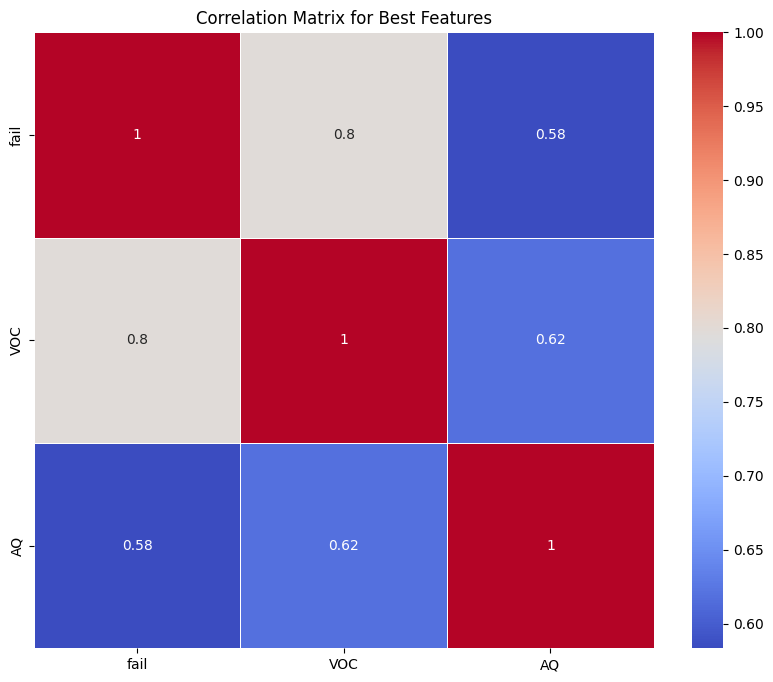

In [63]:

threshold = 0.5
best_features = sorted_correlations[sorted_correlations > threshold].index

best_features = list(best_features)

filtered_data = data[best_features]

best_features_correlation_matrix = filtered_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(best_features_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Best Features')
plt.show()
